In [50]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df = pd.read_csv('dataset.csv')
df = df[df.Stock == 'A']

k=5 #Max lags

X = pd.DataFrame()
X.loc[:,'Day'] = df.loc[:,'Day'].iloc[0:-k].reset_index(drop=True)
y = df['y'].iloc[k:].reset_index(drop=True)
y2 = df['Return'].iloc[k:].reset_index(drop=True)

for i in range(k):
        X.loc[:,('Lag %i' % (i+1))] = df.loc[:,'Average'].iloc[k-1-i:-1-i].reset_index(drop=True)
        
split_var = int(X.shape[0]/4*3)
X_train, X_test, y_train, y_test = [X.iloc[:split_var,:],X.iloc[split_var:,:],y.iloc[:split_var],y.iloc[split_var:]]

In [80]:
X_train.head()

,Day,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5
0,0.166667,0.755849,0.752507,0.733739,0.720884,0.711972
1,0.333333,0.755249,0.755849,0.752507,0.733739,0.720884
2,0.500000,0.766561,0.755249,0.755849,0.752507,0.733739
3,0.666667,0.752250,0.766561,0.755249,0.755849,0.752507
4,0.000000,0.734510,0.752250,0.766561,0.755249,0.755849


In [81]:
size = k+1
hidden_layers = 1000

In [82]:
vb = tf.placeholder("float", [size])
hb = tf.placeholder("float", [hidden_layers])

In [83]:
W = tf.placeholder("float", [size, hidden_layers])

In [84]:
X = tf.placeholder("float", [None, size])
_h0 = tf.nn.sigmoid(tf.matmul(X, W) + hb)  #probabilities of the hidden units
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0)))) #sample_h_given_X

In [85]:
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1)))) #sample_v_given_h
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [86]:
alpha = 0.001
w_pos_grad = tf.matmul(tf.transpose(X), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(X)[0])
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(X - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

In [87]:
err = tf.reduce_mean(tf.square(X - v1))

In [88]:
cur_w = np.zeros([size, hidden_layers], np.float32)
cur_vb = np.zeros([size], np.float32)
cur_hb = np.zeros([hidden_layers], np.float32)
prv_w = np.zeros([size, hidden_layers], np.float32)
prv_vb = np.zeros([size], np.float32)
prv_hb = np.zeros([hidden_layers], np.float32)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [89]:
print("first error ", sess.run(err, feed_dict={X: X_train, W: prv_w, vb: prv_vb, hb: prv_hb}))

first error  0.328008


Epoch: 0 reconstruction error: 0.322779
Epoch: 1 reconstruction error: 0.318577
Epoch: 2 reconstruction error: 0.319441
Epoch: 3 reconstruction error: 0.315323
Epoch: 4 reconstruction error: 0.318257
Epoch: 5 reconstruction error: 0.315353
Epoch: 6 reconstruction error: 0.307319
Epoch: 7 reconstruction error: 0.311539
Epoch: 8 reconstruction error: 0.304374
Epoch: 9 reconstruction error: 0.311386
Epoch: 10 reconstruction error: 0.308338
Epoch: 11 reconstruction error: 0.304542
Epoch: 12 reconstruction error: 0.302600
Epoch: 13 reconstruction error: 0.305159
Epoch: 14 reconstruction error: 0.304991
Epoch: 15 reconstruction error: 0.298556
Epoch: 16 reconstruction error: 0.303006
Epoch: 17 reconstruction error: 0.301262
Epoch: 18 reconstruction error: 0.296487
Epoch: 19 reconstruction error: 0.296875
Epoch: 20 reconstruction error: 0.293885
Epoch: 21 reconstruction error: 0.293306
Epoch: 22 reconstruction error: 0.303395
Epoch: 23 reconstruction error: 0.296617
Epoch: 24 reconstruction e

Epoch: 200 reconstruction error: 0.284941
Epoch: 201 reconstruction error: 0.286857
Epoch: 202 reconstruction error: 0.288083
Epoch: 203 reconstruction error: 0.294680
Epoch: 204 reconstruction error: 0.294783
Epoch: 205 reconstruction error: 0.287621
Epoch: 206 reconstruction error: 0.286984
Epoch: 207 reconstruction error: 0.292375
Epoch: 208 reconstruction error: 0.291196
Epoch: 209 reconstruction error: 0.290422
Epoch: 210 reconstruction error: 0.290033
Epoch: 211 reconstruction error: 0.287300
Epoch: 212 reconstruction error: 0.286678
Epoch: 213 reconstruction error: 0.287607
Epoch: 214 reconstruction error: 0.292217
Epoch: 215 reconstruction error: 0.290450
Epoch: 216 reconstruction error: 0.288260
Epoch: 217 reconstruction error: 0.289915
Epoch: 218 reconstruction error: 0.284695
Epoch: 219 reconstruction error: 0.289167
Epoch: 220 reconstruction error: 0.283618
Epoch: 221 reconstruction error: 0.295110
Epoch: 222 reconstruction error: 0.289518
Epoch: 223 reconstruction error: 0

Epoch: 398 reconstruction error: 0.288372
Epoch: 399 reconstruction error: 0.289099
Epoch: 400 reconstruction error: 0.295129
Epoch: 401 reconstruction error: 0.285104
Epoch: 402 reconstruction error: 0.289904
Epoch: 403 reconstruction error: 0.289735
Epoch: 404 reconstruction error: 0.288355
Epoch: 405 reconstruction error: 0.286490
Epoch: 406 reconstruction error: 0.289337
Epoch: 407 reconstruction error: 0.291659
Epoch: 408 reconstruction error: 0.286279
Epoch: 409 reconstruction error: 0.286220
Epoch: 410 reconstruction error: 0.289139
Epoch: 411 reconstruction error: 0.293765
Epoch: 412 reconstruction error: 0.287469
Epoch: 413 reconstruction error: 0.288213
Epoch: 414 reconstruction error: 0.290501
Epoch: 415 reconstruction error: 0.292650
Epoch: 416 reconstruction error: 0.287983
Epoch: 417 reconstruction error: 0.290656
Epoch: 418 reconstruction error: 0.291677
Epoch: 419 reconstruction error: 0.280953
Epoch: 420 reconstruction error: 0.291972
Epoch: 421 reconstruction error: 0

Epoch: 594 reconstruction error: 0.289623
Epoch: 595 reconstruction error: 0.292955
Epoch: 596 reconstruction error: 0.287423
Epoch: 597 reconstruction error: 0.286351
Epoch: 598 reconstruction error: 0.288965
Epoch: 599 reconstruction error: 0.288488
Epoch: 600 reconstruction error: 0.293781
Epoch: 601 reconstruction error: 0.288447
Epoch: 602 reconstruction error: 0.285129
Epoch: 603 reconstruction error: 0.288040
Epoch: 604 reconstruction error: 0.290838
Epoch: 605 reconstruction error: 0.284369
Epoch: 606 reconstruction error: 0.294174
Epoch: 607 reconstruction error: 0.284504
Epoch: 608 reconstruction error: 0.290542
Epoch: 609 reconstruction error: 0.288252
Epoch: 610 reconstruction error: 0.289570
Epoch: 611 reconstruction error: 0.285035
Epoch: 612 reconstruction error: 0.289614
Epoch: 613 reconstruction error: 0.285669
Epoch: 614 reconstruction error: 0.289402
Epoch: 615 reconstruction error: 0.297402
Epoch: 616 reconstruction error: 0.287721
Epoch: 617 reconstruction error: 0

Epoch: 790 reconstruction error: 0.285967
Epoch: 791 reconstruction error: 0.285794
Epoch: 792 reconstruction error: 0.285481
Epoch: 793 reconstruction error: 0.291668
Epoch: 794 reconstruction error: 0.289930
Epoch: 795 reconstruction error: 0.292894
Epoch: 796 reconstruction error: 0.286165
Epoch: 797 reconstruction error: 0.291895
Epoch: 798 reconstruction error: 0.292803
Epoch: 799 reconstruction error: 0.292481
Epoch: 800 reconstruction error: 0.289346
Epoch: 801 reconstruction error: 0.284242
Epoch: 802 reconstruction error: 0.291799
Epoch: 803 reconstruction error: 0.290736
Epoch: 804 reconstruction error: 0.290933
Epoch: 805 reconstruction error: 0.281100
Epoch: 806 reconstruction error: 0.287347
Epoch: 807 reconstruction error: 0.283113
Epoch: 808 reconstruction error: 0.293000
Epoch: 809 reconstruction error: 0.291533
Epoch: 810 reconstruction error: 0.289144
Epoch: 811 reconstruction error: 0.283135
Epoch: 812 reconstruction error: 0.296629
Epoch: 813 reconstruction error: 0

Epoch: 987 reconstruction error: 0.289852
Epoch: 988 reconstruction error: 0.290914
Epoch: 989 reconstruction error: 0.291855
Epoch: 990 reconstruction error: 0.285124
Epoch: 991 reconstruction error: 0.289376
Epoch: 992 reconstruction error: 0.288836
Epoch: 993 reconstruction error: 0.288541
Epoch: 994 reconstruction error: 0.284007
Epoch: 995 reconstruction error: 0.284243
Epoch: 996 reconstruction error: 0.288217
Epoch: 997 reconstruction error: 0.285871
Epoch: 998 reconstruction error: 0.287119
Epoch: 999 reconstruction error: 0.293931


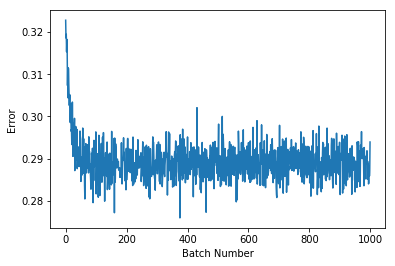

In [90]:
#Parameters
epochs = 1000
batchsize = len(X_train)-90
weights = []
errors = []

for epoch in range(epochs):
    for start, end in zip( range(0, len(X_train), batchsize), range(batchsize, len(X_train), batchsize)):
        batch = X_train[start:end]
        cur_w = sess.run(update_w, feed_dict={ X: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={  X: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={ X: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
        if start % 10000 == 0:
            errors.append(sess.run(err, feed_dict={X: X_train, W: cur_w, vb: cur_vb, hb: cur_hb}))
            weights.append(cur_w)
    print('Epoch: %d' % epoch,'reconstruction error: %f' % errors[-1])
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()